### Dataset Description
The CIFAR-10 data consists of 60,000 32x32 color images in 10 classes, with 6000 images per class. There are 50,000 training images and 10,000 test images in the official data. We have preserved the train/test split from the original dataset.
The provided files are:

- train.7z - a folder containing the training images in png format
- test.7z - a folder containing the test images in png format
- trainLabels.csv - the training labels


The label classes in the dataset are:

- airplane
- automobile
- bird
- cat
- deer
- dog
- frog
- horse
- ship
- truck

The classes are completely mutually exclusive. There is no overlap between automobiles and trucks. "Automobile" includes sedans, SUVs, things of that sort. "Truck" includes only big trucks. Neither includes pickup trucks.

In [1]:
# !pip install kaggle

# configure the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [2]:
# kaggle api
!kaggle competitions download -c cifar-10

 99% 711M/715M [00:09<00:00, 191MB/s]
100% 715M/715M [00:09<00:00, 77.0MB/s]


In [3]:
# to prit the files and folder

!ls

cifar-10.zip  kaggle.json  sample_data


In [4]:
# extract the zip file

from zipfile import ZipFile
dataset = '/content/cifar-10.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print("The data is unzipped")

The data is unzipped


In [5]:
!ls

cifar-10.zip  kaggle.json  sample_data	sampleSubmission.csv  test.7z  train.7z  trainLabels.csv


In [6]:
# since we have 7z file so we need to extract this by python `py7zr` modelule so we need to install that

!pip install py7zr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.9/67.9 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 60.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 83.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.9/138.9 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.7/413.7 kB 34.8 MB/s eta 0:00:00


In [7]:


import py7zr

archive = py7zr.SevenZipFile('/content/train.7z')
archive.extractall()    # to download the train data to specific path : archive.extractall(path = )
archive.close()

### Importing the depenencies

In [8]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split

In [9]:
filename = os.listdir('/content/train')
type(filename)

list

In [10]:
len(filename)

50000

In [11]:
print(filename[0:5])
print(filename[-5:])

['14971.png', '42204.png', '16582.png', '33223.png', '26828.png']
['25346.png', '41656.png', '35110.png', '1383.png', '46856.png']


### Labels processing

In [12]:
labels_df = pd.read_csv('/content/trainLabels.csv')
labels_df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [13]:
labels_df.shape

(50000, 2)

In [14]:
labels_df[labels_df['id'] ==35241]

,id,label
35240,35241,frog


In [15]:
labels_df.head(10)

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile
5,6,automobile
6,7,bird
7,8,horse
8,9,ship
9,10,cat


In [16]:
labels_df.tail(10)

,id,label
49990,49991,deer
49991,49992,bird
49992,49993,airplane
49993,49994,automobile
49994,49995,airplane
49995,49996,bird
49996,49997,frog
49997,49998,truck
49998,49999,automobile
49999,50000,automobile


In [17]:
# we take the id columns and iterate and read all the files and convert into np.array

labels_df['label'].value_counts()

,count
label,
frog,5000
truck,5000
deer,5000
automobile,5000
bird,5000
horse,5000
ship,5000
cat,5000
dog,5000


In [18]:
labels_dictionary = {
                    'airplane' : 0,
                    'automobile' : 1,
                    'bird': 2,
                    'cat': 3,
                    'deer' : 4,
                    'dog': 5,
                    'frog' : 6,
                    'horse' : 7,
                    'ship' : 8,
                    'truck': 9
                    }
labels = labels_df['label'].map(labels_dictionary)

In [19]:
print(labels[0:5])
print(labels[-5:])

0    6
1    9
2    9
3    4
4    1
Name: label, dtype: int64
49995    2
49996    6
49997    9
49998    1
49999    1
Name: label, dtype: int64


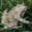

          id label
45280  45281  frog


In [20]:
# displaying a sample image

import cv2
from google.colab.patches import cv2_imshow

img =cv2.imread('/content/train/45281.png')
cv2_imshow(img)

print(labels_df[labels_df['id'] ==45281])

In [21]:
# we need to read the images from train folder becasuse they are not in the proper order as id

labels_df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [22]:
id_list = list(labels_df['id'])

print(id_list[0:5])
print(id_list[-5:])

[1, 2, 3, 4, 5]
[49996, 49997, 49998, 49999, 50000]


### Image processing

In [23]:
# Now we need to pass in for loop to .png and read to all the number
 # convert the images to numpy array

train_data_folder = '/content/train/'

data = []

for id in id_list:
  image_path  = Image.open(train_data_folder + str(id) + '.png')
  image_path = np.array(image_path)

  data.append(image_path)


In [24]:
print(len(data))
print(type(data[0]))
print(data[0].shape)

50000
<class 'numpy.ndarray'>
(32, 32, 3)


array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
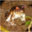

In [25]:
data[0]

In [26]:
# conver the image list and labels list to numpy array for faster computation

X = np.array(data)
y = np.array(labels)

In [27]:
print(X.shape, y.shape)

(50000, 32, 32, 3) (50000,)


### Train and test split of the both the above data

In [28]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=2)

In [29]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(40000, 32, 32, 3) (10000, 32, 32, 3) (40000,) (10000,)


### Scaling the data

In [30]:
# all the values will convert between 0-1

x_train_scaled = x_train/255
x_test_scaled = x_test/255

In [31]:
x_train_scaled[0]

array([[[0.81960784, 0.82352941, 0.79607843],
        [0.83529412, 0.83921569, 0.81960784],
        [0.85490196, 0.85882353, 0.84313725],
        ...,
        [0.49803922, 0.29019608, 0.15294118],
        [0.47843137, 0.26666667, 0.1372549 ],
        [0.45490196, 0.24705882, 0.1254902 ]],

       [[0.82352941, 0.82352941, 0.79215686],
        [0.83529412, 0.83921569, 0.81176471],
        [0.85490196, 0.8627451 , 0.83921569],
        ...,
        [0.48627451, 0.2745098 , 0.1372549 ],
        [0.4745098 , 0.2627451 , 0.12941176],
        [0.48235294, 0.27058824, 0.14117647]],

       [[0.80784314, 0.80392157, 0.76470588],
        [0.81960784, 0.81960784, 0.79215686],
        [0.83529412, 0.84313725, 0.81960784],
        ...,
        [0.48627451, 0.2745098 , 0.14509804],
        [0.51372549, 0.30196078, 0.16470588],
        [0.51372549, 0.30588235, 0.16078431]],

       ...,

       [[0.49803922, 0.42352941, 0.38039216],
        [0.54117647, 0.47843137, 0.43137255],
        [0.55294118, 0

## Making the Neural Network

In [32]:
# import the libraries for the neural network

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D


In [33]:
# number of classes

num_of_class = 10 # we have 10 in putput classes

# setting up the layes

model = Sequential([

                  keras.layers.Flatten(input_shape = (32,32,3)),  # to turn the metric into an array to pass in input
                  keras.layers.Dense(64, activation='relu'),  # hidden layer
                  keras.layers.Dense(num_of_class, activation='softmax')   # the number of neuron in o/p class should as the number of classes

])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [37]:
## Compile the neural network

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics = ['acc'])

In [39]:
# train the neural netowrk

# validatoin is just like test size

model.fit(x_train_scaled, y_train, validation_split=0.1, epochs=20)

Epoch 1/20
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - acc: 0.3360 - loss: 1.8138 - val_acc: 0.3275 - val_loss: 1.8250
Epoch 2/20
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - acc: 0.3355 - loss: 1.8178 - val_acc: 0.3422 - val_loss: 1.8176
Epoch 3/20
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.3442 - loss: 1.8039 - val_acc: 0.3465 - val_loss: 1.8089
Epoch 4/20
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.3440 - loss: 1.8001 - val_acc: 0.3363 - val_loss: 1.8140
Epoch 5/20
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.3429 - loss: 1.7999 - val_acc: 0.3280 - val_loss: 1.8260
Epoch 6/20
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - acc: 0.3473 - loss: 1.8011 - val_acc: 0.3470 - val_loss: 1.8107
Epoch 7/20
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.3457 - loss: 1.7927 - val_acc: 0.3442 - val_loss: 1.8030
Epoch 8/20
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.3388 - loss: 1.7979 - val_acc: 0.3360 - val_loss: 1.8152
Epoch 9/20
1125/1125 ━━━━━━━━━━━━━━━━━━━

- Since our own model is not much accurate so we use the technique of `Transfer Learning'

### Transfer Learning `RestNet50`

In [41]:
from tensorflow.keras import Sequential, models, layers
from tensorflow.keras.layers import Dropout, Dense, Flatten, BatchNormalization
from tensorflow.keras.models import load_model, Model
# restnet50
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import optimizers


In [42]:
# train the model on top of ours data
                                  # image database when this model is train and by this we retain the model with the weights
                                  # include_top : it will drop the output layer we has custome layer with 10 class
concvolution_basemodel = ResNet50(weights='imagenet', include_top=False, input_shape=(256, 256, 3) )

concvolution_basemodel.summary()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 256, 256, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 262, 262, 3)    │              0 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 128, 128, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 128, 128, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 128, 128, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 130, 130, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 64, 64, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 64, 64, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 64, 64, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 64, 64, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 64, 64, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 64, 64, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 64, 64, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 64, 64, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 64, 64, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [46]:
# adding our own layers to this

model = Sequential()

model.add(layers.UpSampling2D((2,2)))
# we have to upscale the data from 32 -> 256 that's why we use Upsampling thrice  this is train on the image of 256x256 to input
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))

# adding the ResNet50 base model
model.add(concvolution_basemodel)
model.add(layers.Flatten())
model.add(layers.BatchNormalization())  # to make all the values to the same range at the end of each layer b/c of the layers output
model.add(layers.Dense(128, activation='relu'))

# to remove the overfitting of the model , it turn off few neurons
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())

model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(num_of_class, activation='softmax'))

In [47]:
model.compile(optimizer=optimizers.RMSprop(learning_rate=2e-5), loss='sparse_categorical_crossentropy', metrics = ['acc'])

In [48]:
# fit the model

history = model.fit(x_train_scaled, y_train, validation_split=0.1, epochs = 10)

Epoch 1/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 455s 338ms/step - acc: 0.3174 - loss: 2.0586 - val_acc: 0.7732 - val_loss: 0.8555
Epoch 2/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 383s 341ms/step - acc: 0.6684 - loss: 1.0950 - val_acc: 0.8668 - val_loss: 0.5433
Epoch 3/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 433s 333ms/step - acc: 0.7965 - loss: 0.7673 - val_acc: 0.9147 - val_loss: 0.3532
Epoch 4/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 381s 332ms/step - acc: 0.8630 - loss: 0.5821 - val_acc: 0.9273 - val_loss: 0.2872
Epoch 5/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 382s 333ms/step - acc: 0.9091 - loss: 0.4449 - val_acc: 0.9358 - val_loss: 0.2418
Epoch 6/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 374s 333ms/step - acc: 0.9320 - loss: 0.3580 - val_acc: 0.9367 - val_loss: 0.2410
Epoch 7/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 383s 333ms/step - acc: 0.9565 - loss: 0.2770 - val_acc: 0.9365 - val_loss: 0.2323
Epoch 8/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 391s 341ms/step - acc: 0.9629 - loss: 0.2342 - val_acc: 0.9385 - val_loss: 0.2319
Epoch 9/

In [49]:
loss, accuracy = model.evaluate(x_test_scaled, y_test)
print("Test Accuracy: ", accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 43s 106ms/step - acc: 0.9359 - loss: 0.2301
Test Accuracy:  0.9373000264167786


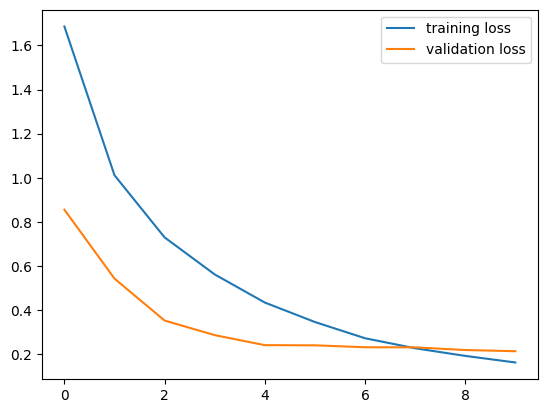

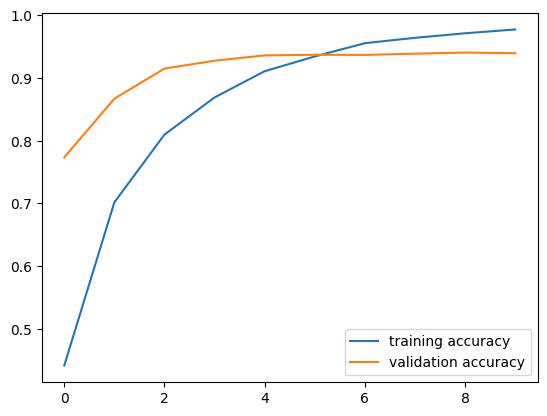

In [50]:
h = history
# plot the loss value
plt.plot(h.history['loss'], label= 'training loss')
plt.plot(h.history['val_loss'], label= 'validation loss')
plt.legend()
plt.show()

# for accuracy value
plt.plot(h.history['acc'], label= 'training accuracy')
plt.plot(h.history['val_acc'], label= 'validation accuracy')
plt.legend()
plt.show()